# Prévoir l'effet d'une quelconque exposition à un champ magnétique.

### Projet en Data Science.

***

-  Importation des packages nécessaires.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import pickle

# Ouvrir/ importer la base de données.

In [4]:
donnees = pd.read_csv('MF exposure - data.csv')
donnees

,Fréquence,Induction_magnétique,Durée_exposition,Type_exposition,Distance,Âge,Sexe,Effet
0,EBF,30.000,longue,chronique,intermédiaire,âgé,féminin,Biologique
1,EBF,0.450,longue,chronique,grande,jeune,masculin,Biologique
2,Hyperfréquences,1.112,modérée,aiguë,petite,jeune,féminin,Pas d’effet
3,EBF,0.070,longue,chronique,grande,jeune,masculin,Biologique
4,EBF,1250.000,longue,chronique,intermédiaire,adulte,masculin,Biologique
...,...,...,...,...,...,...,...,...
459,Hyperfréquences,1500000.000,modérée,aiguë,intermédiaire,adulte,masculin,Pas d’effet
460,EBF,0.700,longue,chronique,grande,adulte,féminin,Biologique
461,EBF,0.300,longue,chronique,intermédiaire,adulte,masculin,Pathologique
462,Hyperfréquences,1.124,modérée,aiguë,petite,âgé,féminin,Pas d’effet


In [5]:
# Création d'une copy de la base de données.
data = donnees.copy()
data

,Fréquence,Induction_magnétique,Durée_exposition,Type_exposition,Distance,Âge,Sexe,Effet
0,EBF,30.000,longue,chronique,intermédiaire,âgé,féminin,Biologique
1,EBF,0.450,longue,chronique,grande,jeune,masculin,Biologique
2,Hyperfréquences,1.112,modérée,aiguë,petite,jeune,féminin,Pas d’effet
3,EBF,0.070,longue,chronique,grande,jeune,masculin,Biologique
4,EBF,1250.000,longue,chronique,intermédiaire,adulte,masculin,Biologique
...,...,...,...,...,...,...,...,...
459,Hyperfréquences,1500000.000,modérée,aiguë,intermédiaire,adulte,masculin,Pas d’effet
460,EBF,0.700,longue,chronique,grande,adulte,féminin,Biologique
461,EBF,0.300,longue,chronique,intermédiaire,adulte,masculin,Pathologique
462,Hyperfréquences,1.124,modérée,aiguë,petite,âgé,féminin,Pas d’effet


***

# Nettoyer la Data 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fréquence             464 non-null    object 
 1   Induction_magnétique  464 non-null    float64
 2   Durée_exposition      464 non-null    object 
 3   Type_exposition       464 non-null    object 
 4   Distance              464 non-null    object 
 5   Âge                   464 non-null    object 
 6   Sexe                  464 non-null    object 
 7   Effet                 464 non-null    object 
dtypes: float64(1), object(7)
memory usage: 29.1+ KB


In [8]:
# Vérification de la présence/abscence des valeurs manquantes 
data.isnull().sum()

Fréquence               0
Induction_magnétique    0
Durée_exposition        0
Type_exposition         0
Distance                0
Âge                     0
Sexe                    0
Effet                   0
dtype: int64

In [9]:
# suppression des lignes dupliquées (s'elles existent)
print("Dimension initiale de la base de données : ", data.shape)
data.drop_duplicates(inplace=True)
print("après nettoyage, la dimension devient : ", data.shape)

Dimension initiale de la base de données :  (464, 8)
après nettoyage, la dimension devient :  (460, 8)


# Explorer la Data

###  Analyse descriptive univariée.

### Variable target

In [10]:
data.columns

Index(['Fréquence', 'Induction_magnétique', 'Durée_exposition',
       'Type_exposition', 'Distance', 'Âge', 'Sexe', 'Effet'],
      dtype='object')

In [11]:
# Exploration de la variable 'Effet': la variable target
data["Effet"].value_counts()

Biologique      171
Pathologique    153
Pas d’effet     136
Name: Effet, dtype: int64

In [12]:
# En termes de pourcentage
data["Effet"].value_counts(normalize=True)*100

Biologique      37.173913
Pathologique    33.260870
Pas d’effet     29.565217
Name: Effet, dtype: float64

<AxesSubplot:title={'center':'Effet'}>

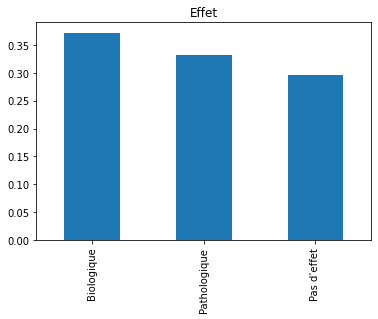

In [13]:
# Visualisation graphique 
data["Effet"].value_counts(normalize=True).plot.bar(title='Effet')

### Variables catégoriques

-  Variable 'Fréquence'

In [14]:
data['Fréquence'].value_counts()

EBF                300
Hyperfréquences    160
Name: Fréquence, dtype: int64

In [15]:
data["Fréquence"].value_counts(normalize=True)*100

EBF                65.217391
Hyperfréquences    34.782609
Name: Fréquence, dtype: float64

<AxesSubplot:title={'center':'Fréquence'}>

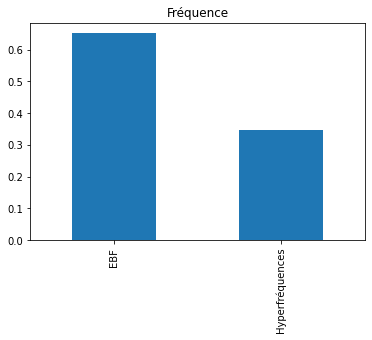

In [16]:
data["Fréquence"].value_counts(normalize=True).plot.bar(title='Fréquence')

-  Variable 'Sexe'

In [17]:
data['Sexe'].value_counts()

féminin     236
masculin    224
Name: Sexe, dtype: int64

In [18]:
data["Sexe"].value_counts(normalize=True)*100

féminin     51.304348
masculin    48.695652
Name: Sexe, dtype: float64

<AxesSubplot:title={'center':'Sexe'}>

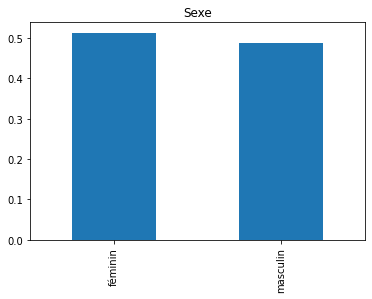

In [19]:
data["Sexe"].value_counts(normalize=True).plot.bar(title='Sexe')

#### On peut faire de même pour l'analyse des autres variables catégoriques.

### variable numérique (Induction_magnétique)

In [20]:
data["Induction_magnétique"].describe()

count    4.600000e+02
mean     1.001330e+05
std      7.176394e+05
min      1.000000e-02
25%      2.297500e-01
50%      1.000000e+00
75%      3.000000e+01
max      7.000000e+06
Name: Induction_magnétique, dtype: float64

### Visualisation de la distribution des valeurs de l'induction magnétique

In [21]:
Grande_IndMg = data.loc[(data["Induction_magnétique"] >= 500)]
visualized_df = data.drop(Grande_IndMg.index)

print('Dimension de la data initiale : ', data.shape)
print('Dimension de la data utilisée pour la visualisation en question : ', visualized_df.shape)

Dimension de la data initiale :  (460, 8)
Dimension de la data utilisée pour la visualisation en question :  (421, 8)


C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


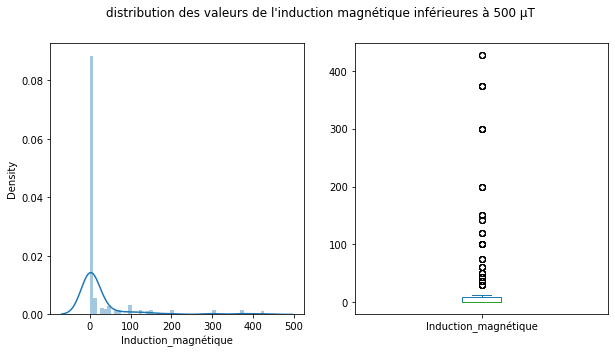

In [22]:
plt.figure()

plt.subplot(1, 2, 1)
sb.distplot(visualized_df["Induction_magnétique"])
           
plt.subplot(1, 2, 2)
visualized_df["Induction_magnétique"].plot.box(figsize=(10, 5))

plt.suptitle("distribution des valeurs de l'induction magnétique inférieures à 500 μT")
plt.show()

***

## Analyse descriptive bivariée

-  Variables catégorique

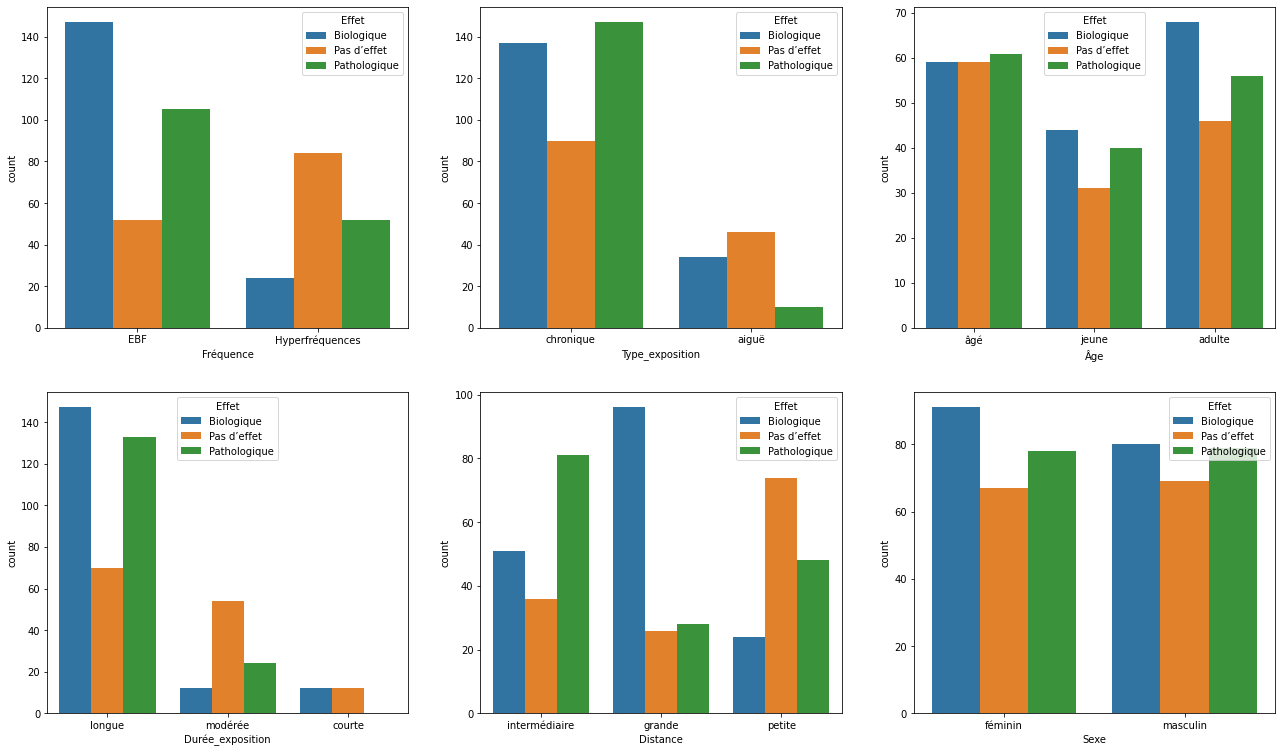

In [22]:
variables_categorielles = ["Fréquence", "Durée_exposition", "Type_exposition", "Distance", "Âge", "Sexe"]
fig, axes = plt.subplots(2, 3, figsize=(22, 13))

for index, colonne in enumerate(variables_categorielles):
    row, col=index // 2, index % 2
    sb.countplot(x=colonne, data=data, hue="Effet", ax=axes[col, row]) 

***

# Création du modèle

### Encodage des caractéristiques catégorielles

In [24]:
variables_categorielles = ["Fréquence", "Durée_exposition", "Type_exposition", "Distance", "Âge", "Sexe"]
data_cat=pd.get_dummies(data[variables_categorielles], drop_first=True)
data_cat

,Fréquence_Hyperfréquences,Durée_exposition_longue,Durée_exposition_modérée,Type_exposition_chronique,Distance_intermédiaire,Distance_petite,Âge_jeune,Âge_âgé,Sexe_masculin
0,0,1,0,1,1,0,0,1,0
1,0,1,0,1,0,0,1,0,1
2,1,0,1,0,0,1,1,0,0
3,0,1,0,1,0,0,1,0,1
4,0,1,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
459,1,0,1,0,1,0,0,0,1
460,0,1,0,1,0,0,0,0,0
461,0,1,0,1,1,0,0,0,1
462,1,0,1,0,0,1,0,1,0


### Reconstruction de la Data (encodée)

In [25]:
dataCatEnc_dummies = pd.concat([data_cat, data["Induction_magnétique"]], axis=1)
dataCatEnc_dummies

,Fréquence_Hyperfréquences,Durée_exposition_longue,Durée_exposition_modérée,Type_exposition_chronique,Distance_intermédiaire,Distance_petite,Âge_jeune,Âge_âgé,Sexe_masculin,Induction_magnétique
0,0,1,0,1,1,0,0,1,0,30.000
1,0,1,0,1,0,0,1,0,1,0.450
2,1,0,1,0,0,1,1,0,0,1.112
3,0,1,0,1,0,0,1,0,1,0.070
4,0,1,0,1,1,0,0,0,1,1250.000
...,...,...,...,...,...,...,...,...,...,...
459,1,0,1,0,1,0,0,0,1,1500000.000
460,0,1,0,1,0,0,0,0,0,0.700
461,0,1,0,1,1,0,0,0,1,0.300
462,1,0,1,0,0,1,0,1,0,1.124


### Séparation de l'entrée et de la sortie

In [26]:
X = dataCatEnc_dummies
y = data['Effet']

### Division de la data en ensembles d'entraînement et de test

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Création d'une instance pour le model - Entrainement du modèle

In [29]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
# tester le model - évaluer sa précision
prediction = model.predict(X_test)
score = accuracy_score(y_test, prediction)
score

0.75

# Faire une prédiction

## Prévoir l'effet de l'exposition de ma mère

In [31]:
X.columns

Index(['Fréquence_Hyperfréquences', 'Durée_exposition_longue',
       'Durée_exposition_modérée', 'Type_exposition_chronique',
       'Distance_intermédiaire', 'Distance_petite', 'Âge_jeune', 'Âge_âgé',
       'Sexe_masculin', 'Induction_magnétique'],
      dtype='object')

In [33]:
tester_exposition = [[1, 1, 0, 0, 0, 1, 0, 0, 0, 0.226]]
model.predict(tester_exposition)

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Pas d’effet'], dtype=object)

# Enregistrer le modèle

In [32]:
pickle.dump(model, open('prévoir_exposition.pkl', 'wb'))